<a href="https://colab.research.google.com/github/katrienvanmeulder/STEM6/blob/master/20201001_geheimschrift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://www.youtube.com/watch?v=G2_Q9FoD-oQ
- https://www.youtube.com/watch?v=nEomYB94TTI




---

# Load txt file and calculate frequency per letter

---



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Colab Notebooks/STEM/2020-2021/Stem_6

/content/gdrive/My Drive/Colab Notebooks/STEM/2020-2021/Stem_6


In [ ]:
alphabet = "abcdefghijklmnopqrstuvwxyz"

In [ ]:
def getFrequenciesForEachLetter(fileName):
  alphabet = "abcdefghijklmnopqrstuvwxyz"
  frequencies = {i:0 for i in alphabet}
  with open(fileName, "r") as infile:
    for line in infile:
      #change to lower case
      line = line.lower()
      line = line.replace("ï", "i")
      line = line.replace("ë", "e")
      line = line.replace("é", "e")
      line = line.replace("ö", "o") 
      for i in line: 
        if i in alphabet: 
            frequencies[i] += 1
  return frequencies

In [ ]:
frequencies = getFrequenciesForEachLetter('normalText.txt')

In [ ]:
values = list(frequencies.values())
sum = np.sum(values)
labels = list(frequencies.keys())

In [ ]:
freqPercentagePerLetter = [np.round(i/sum*100,2) for i in values]

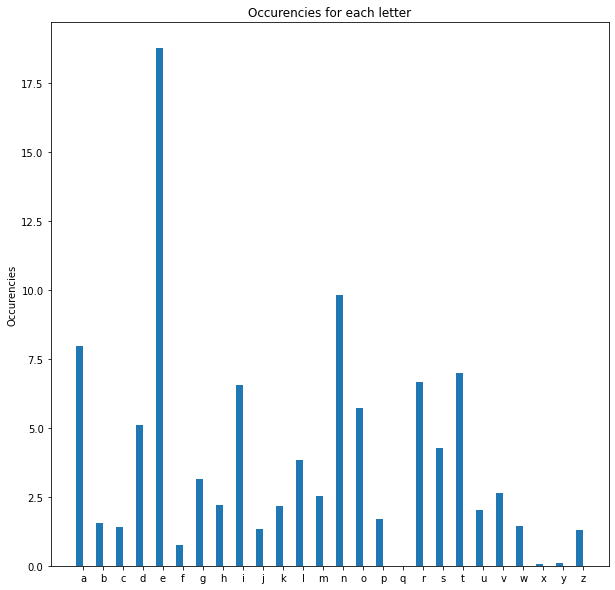

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10,10) )
#rects1 = ax.bar(x - width/2, values , width )
rects2 = ax.bar(x - width/2, freqPercentagePerLetter , width )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Occurencies')
ax.set_title('Occurencies for each letter')
ax.set_xticks(x)
_ = ax.set_xticklabels(labels)
#ax.legend()




---


# Encrypt text

 - Shift 1 to the right
 - a wordt b
 - b wordt c
 - c wordt d
 - ....

---

In [ ]:
def encryptDecryptText(fileToEncryptDecrypt, name_new_file, keyToDecryptEncrypt):
  """
  fileToEncryptDecrypt --> string 
  name_new_file --> string
  keyToDecryptEncrypt --> dictionary
  """
  alphabet = "abcdefghijklmnopqrstuvwxyz"

  #create new file
  f_encrypted= open(name_new_file,"w+")

  #load original text
  with open(fileToEncryptDecrypt, "r") as infile:
    for line in infile:
      #change to lower case
      line = line.lower()

      line = line.replace("ï", "i")
      line = line.replace("ë", "e")
      line = line.replace("é", "e")
      line = line.replace("ö", "o") 
      #print("original =" + line)
      newLine = ""
      for i in line:
        if i in alphabet:
          newLine += dict_to_encrypt[i]
        else:
          newLine += i
      #print("encrypted = " + newLine)
      f_encrypted.write(newLine)


  f_encrypted.close()

In [ ]:
#shift alphabet 1 to the right
shifted = alphabet[1:] + alphabet[0]

In [ ]:
#dict_to_encrypt
dict_to_encrypt = {alphabet[i]:shifted[i] for i in range(26)}

In [ ]:
encryptDecryptText("text1_original.txt","text1_encrypted.txt", dict_to_encrypt)



---

# Load encrypted text

---



In [ ]:
frequenciesEncryptedText = getFrequenciesForEachLetter('text1_encrypted.txt')

In [ ]:
# encrypted frequencies
valuesEncrypted = list(frequenciesEncryptedText.values())
sumEncryptedFreq = np.sum(valuesEncrypted)
freqPercentagePerLetterEncrypted = [np.round(i/sumEncryptedFreq*100,2) for i in valuesEncrypted]

# normal frequencies
#frequenciesOriginal = getFrequenciesForEachLetter('text1_original.txt')
valuesNormal = list(frequencies.values())
sumNormalFreq = np.sum(valuesNormal)
freqPercentagePerLetterNormal = [np.round(i/sumNormalFreq*100,2) for i in valuesNormal]

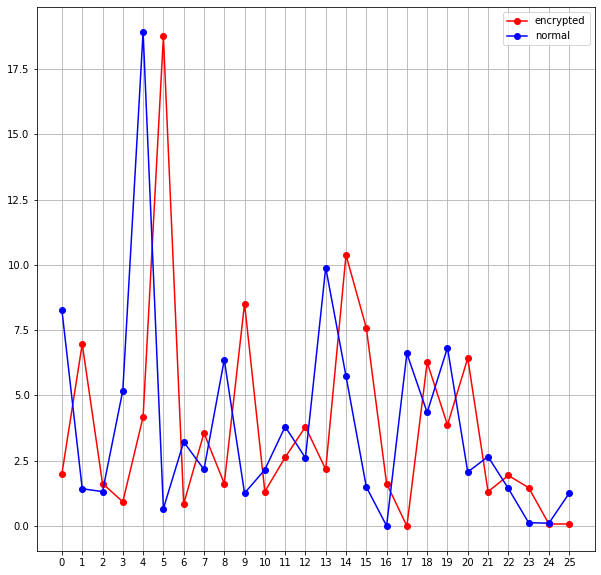

In [ ]:
fig, ax = plt.subplots(figsize = (10,10) )
ax.plot(freqPercentagePerLetterEncrypted , 'ro-', label= 'encrypted')
ax.plot(freqPercentagePerLetterNormal , 'bo-', label = 'normal')
ax.grid(True)
ax.legend()
_ = ax.set_xticks(x)



---


# Encrypt text - shifted 5 to the right

 - Shift 5 to the right
 - a wordt f
 - b wordt g
 - c wordt h
 - ....

---

In [ ]:
#shift alphabet 1 to the right
shifted_5 = alphabet[5:] + alphabet[0:5]

#dict_to_encrypt
dict_to_encrypt_5 = {alphabet[i]:shifted_5[i] for i in range(26)}

In [ ]:
encryptDecryptText("text1_original.txt","text1_encrypted_shift5.txt", dict_to_encrypt_5)

---

# Load encrypted text - shifted 5 to the right

---


In [ ]:
frequenciesEncryptedText = getFrequenciesForEachLetter('text1_encrypted_shift5.txt')

In [ ]:
# encrypted frequencies
valuesEncrypted = list(frequenciesEncryptedText.values())
sumEncryptedFreq = np.sum(valuesEncrypted)
freqPercentagePerLetterEncrypted = [np.round(i/sumEncryptedFreq*100,2) for i in valuesEncrypted]

# normal frequencies
valuesNormal = list(frequencies.values())
sumNormalFreq = np.sum(valuesNormal)
freqPercentagePerLetterNormal = [np.round(i/sumNormalFreq*100,2) for i in valuesNormal]

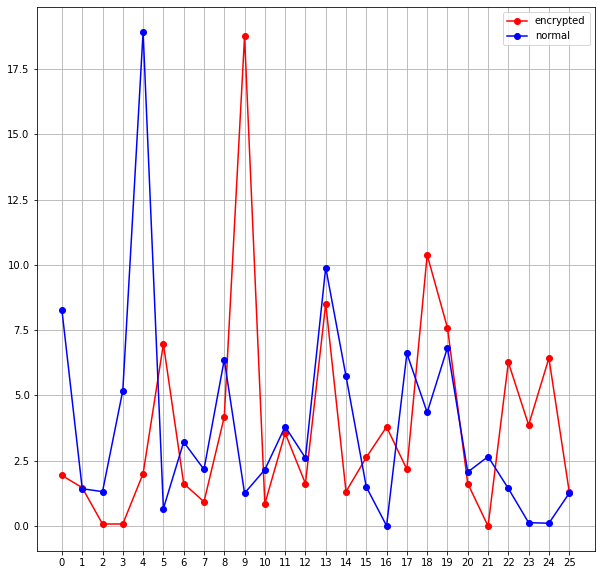

In [ ]:
fig, ax = plt.subplots(figsize = (10,10) )
ax.plot(freqPercentagePerLetterEncrypted , 'ro-', label = "encrypted")
ax.plot(freqPercentagePerLetterNormal , 'bo-', label = "normal")
ax.grid(True)
ax.legend()
_ = ax.set_xticks(x)

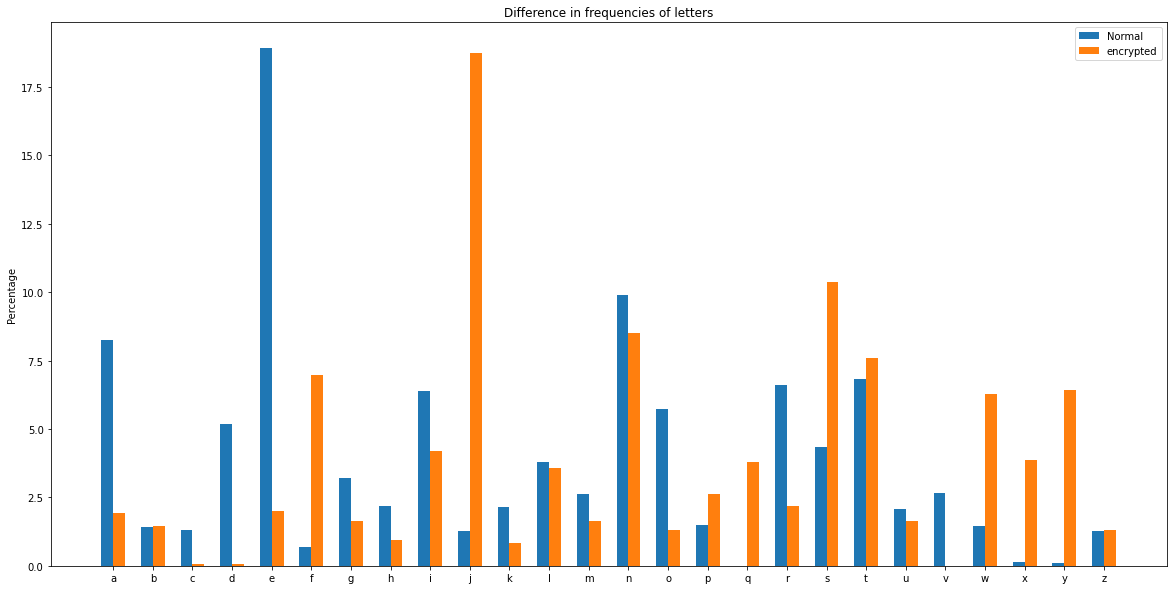

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, freqPercentagePerLetterNormal, width, label='Normal')
rects2 = ax.bar(x + width/2, freqPercentagePerLetterEncrypted, width, label='encrypted')


ax.set_ylabel('Percentage')
ax.set_title('Difference in frequencies of letters')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



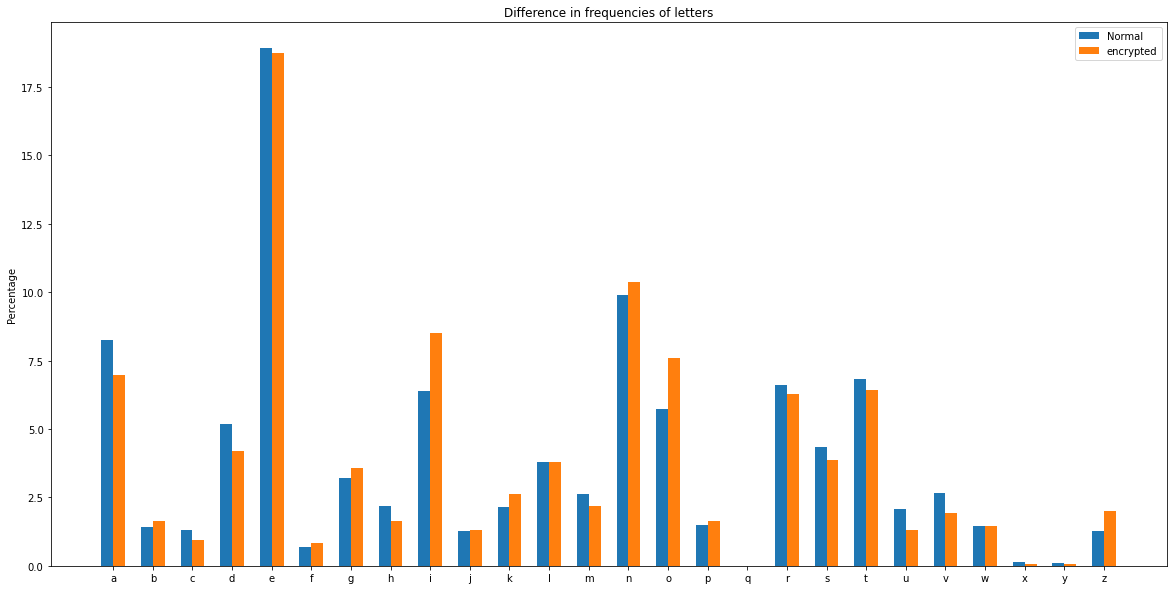

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, freqPercentagePerLetterNormal, width, label='Normal')
rects2 = ax.bar(x + width/2, freqPercentagePerLetterEncrypted[5:]+freqPercentagePerLetterEncrypted[:5], width, label='encrypted')


ax.set_ylabel('Percentage')
ax.set_title('Difference in frequencies of letters')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


In [ ]:
for i in np.arange(26):
  print(freqPercentagePerLetterNormal[i], freqPercentagePerLetterEncrypted[i])

8.26 2.01
1.43 6.97
1.32 1.63
5.19 0.93
18.92 4.18
0.67 18.75
3.22 0.85
2.17 3.56
6.37 1.63
1.26 8.52
2.16 1.32
3.81 2.63
2.61 3.8
9.9 2.17
5.74 10.38
1.5 7.59
0.01 1.63
6.61 0.0
4.35 6.27
6.83 3.87
2.07 6.43
2.66 1.32
1.44 1.94
0.13 1.47
0.11 0.08
1.26 0.08
